# Detecção de Fraude em Cartões de Crédito

  
  <center><img alt="Analisando Airbnb" width="50%" src="https://olhardigital.com.br/wp-content/uploads/2021/02/shutterstock_223094779.jpg"></center>
  
  O número de fraudes envolvendo pagamento com cartões de crédito disparou no país. São aproximadamente 3,6 fraudes por minuto. Além das fraudes cibernéticas, que provocam prejuízos e transtornos para os donos dos cartões, também vêm crescendo os golpes nos quais as vítimas são induzidas pelos criminosos, em geral por contatos telefônicos, a liberar seus dados e, às vezes, entregar os próprios cartões.[1] 
  
  Pesquisa realizada pela TransUnion, companhia internacional de soluções de informação e *insights* de dados, indica que o roubo de identidade on-line, conhecido por *phishing*, é o principal esquema de cibercrime em todo o mundo. No Brasil, o furto de cartões de crédito e cobranças fraudulentas correspondem a 26% das reclamações.[2]

  Cada vez mais os Banco e Administradoras de cartões de crédito buscam  soluções para minimizar prejuízos causados por estelionatários. Assim, este trabalho tem como objetivo a construção de um modelo de *machine learning* capaz de prever quando uma operação com cartão de crédito é fraudulenta ou não. Para isso, farei um estudo inicial do conjunto de dados, em seguida um tratamento nos dados e aplicação de 3 modelos com alguns ajustes. Procurei documentar minusciosamente cada passo do projeto.

  

## 1 - Importação de *dataset*

Para este trabalho, utilizei dados disponibilizados em:
 https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code

 Este conjunto de dados contém transações efetuadas em Setembro de 2013 (2 dias) pelos titulares europeus de cartões de crédito.


In [ ]:
## Importando bibliotecas necessárias

# Manipulação de dataframes
import pandas as pd
# Visualização de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# Escalonamento
from sklearn.preprocessing import StandardScaler
# Separação em dados de treino e teste
from sklearn.model_selection import train_test_split
# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Cross Validation
from sklearn.model_selection import cross_validate
# Oversampling
from imblearn.over_sampling import RandomOverSampler
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Ajuste de hiperprâmetros
from sklearn.model_selection import GridSearchCV

# Visualizar todas as colunas do dataset
pd.set_option('display.max_columns', None)

In [ ]:
# Carregando dataset
arquivo = '/content/creditcard.csv.zip'
df = pd.read_csv(arquivo)

## 2 - Explorando os dados

In [ ]:
# Verificando primeiros registros
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 O *dataset* contém apenas variáveis de entrada numéricas. As variáveis V1 a V28 são o resultado de uma transformação **PCA (Análise de Componentes Principais)**. Esta técnica serve para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais[3], com isso diminui o número de variáveis envolvidas no processo e sua complexidade. Como efeito, perde-se o significado real de cada variável (impossível explicar o que cada uma representa), porém mantém-se a informação para uso nos algorítmos de *machine learning*.
 
 Devido a questões de confidencialidade, não foram fornecidas mais informações sobre o *dataset*. As únicas características que não foram transformadas pelo PCA são **'Time'** e **'Amount'**. 
 
 A característica **'Time'** representa os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A característica **'Amount'** é o montante da transação. A característica **'Class'** é a variável de resposta e toma valor 1 em caso de fraude e 0 em caso contrário.


In [ ]:
# Verificando tamanho do dataset
print(f'Este dataset possui {df.shape[0]} registros e {df.shape[1]} colunas')

Este dataset possui 284807 registros e 31 colunas


In [ ]:
# Verificando valores nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há, portanto, valores nulos ou faltantes no conjunto de dados. Seguimos agora com uma verificação sobre a variável objetivo.

In [ ]:
# Verificação da coluna Class
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

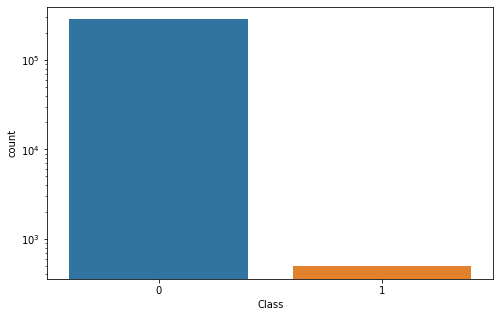

In [ ]:
plt.figure(figsize=(8,5))
_= sns.countplot(x='Class', data = df, log=True)
# Utilizando base logarítimica para melhor visualização

Verifica-se um enorme desbalanceamento na variável **Class**. Para melhor performance do algorítmo de *machine learning* usaremos técnicas para balanceamento dos dados.

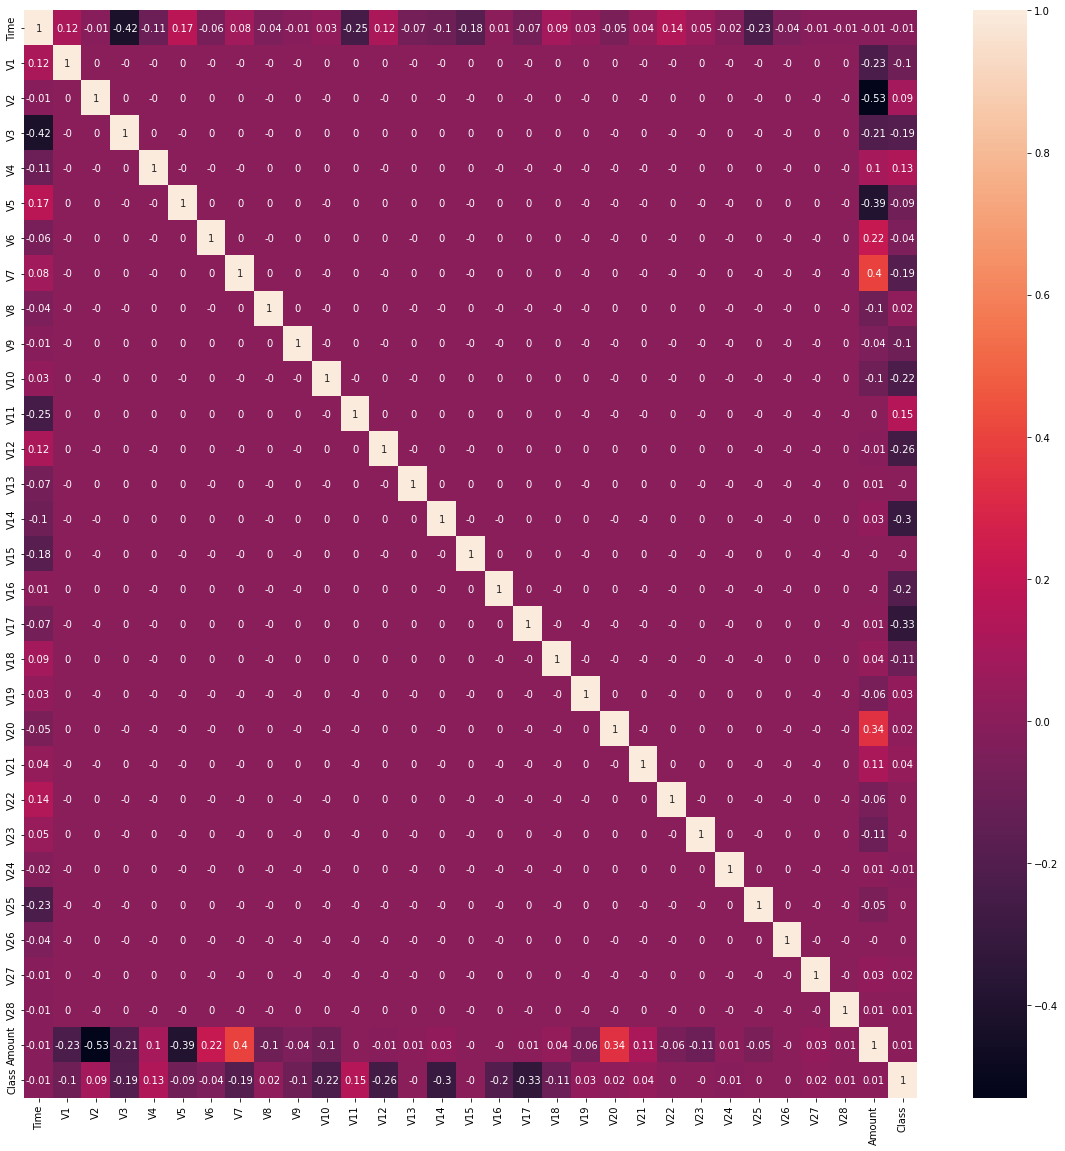

In [ ]:
# Verificando correlação entre atributos
plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2), annot=True)

Como o *dataset* passou pelo processo de **PCA**, era de se esperar que não houvesse forte corelação entre as variáveis independentes. Vamos aqui verificar a correlação delas com a variável alvo.

In [ ]:
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


Como observado, nenhuma variável tem forte correlação com a variável alvo. Seguimos com nosso estudos.

## 3 - Preprocessamento do dataset para uso em Machine Learning

### 3.1 - Definição de variáveis dependente e independentes

In [ ]:
# Definição de variável dependente
col_target = 'Class'
target = df[col_target]
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
# Definição de variáveis independentes
data = df.drop(columns = col_target)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### 3.2 - Padronização de vairáveis independentes
Para melhor desempenhos dos algorítmos usados a seguir, faremos a padronização das variáveis independentes.



In [ ]:
# Padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
print(data_scaled)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


### 3.3 - Separação de dataset em treino e teste
Como estratégia para aprendizado dos algorítmos e posterior validação do nosso modelo, efetuarei a separação do *dataset* em dados para treino e dados para teste.

O conjuto de dados para treino será então dividido novamente utilizando técnica de *Cross Validation*.

In [ ]:
# Separação do dataset
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size = 0.2, random_state = 7)

## 4 - Escolha do algorítimo de Machine Learning
Neste ponto iniciaremos os teste com 3 algorítmos: **Regressão Logística**, **Random Forest** e **KNN**. Em seguida farei a escolha por um destes para aplicar no conjunto de teste.

### 4.1 - Dataset não balanceado

Primeiramente treinaremos os modelos com o *dataset* original, com dados extremamente desbalanceados. Para avaliação dos modelos, utilizarei a acurácia e o **f1-score**. 
Essa métrica combina **precisão** e **recall** de modo a trazer um número único que indique a qualidade geral do seu modelo e trabalha bem até com conjuntos de dados que possuem classes desproporcionais.[4]


In [ ]:
# Conjunto de modelos
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

# Métricas de cada modelo

for model in models:
    cv_results = cross_validate(model, data_train, target_train, cv=5, scoring=['accuracy','f1'])
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo: {} \nMédia accuracy: {:.3f} | Desvio accuracy: {:.3f}'.format(nome_modelo,
                                    cv_results['test_accuracy'].mean(), 
                                    cv_results['test_accuracy'].std()))
    print('Média f1-score: {:.3f} | Desvio f1-score: {:.3f}\n'.format(
                                    cv_results['test_f1'].mean(), 
                                    cv_results['test_f1'].std()))
    

Modelo: LogisticRegression 
Média accuracy: 0.999 | Desvio accuracy: 0.000
Média f1-score: 0.722 | Desvio f1-score: 0.048

Modelo: RandomForestClassifier 
Média accuracy: 1.000 | Desvio accuracy: 0.000
Média f1-score: 0.852 | Desvio f1-score: 0.027

Modelo: KNeighborsClassifier 
Média accuracy: 0.999 | Desvio accuracy: 0.000
Média f1-score: 0.820 | Desvio f1-score: 0.045



O melhor desempenho neste cenário foi do **Random Forest** com acurácia de 1.000 e f1-score de 0.852.

### 4.2 - Dataset balanceado
Nesta seção utilizaremos dois métodos para balamceamento do *dataset*. O ***oversampling*** gera novos dados  da classe minoritária, deixando o *dataset* com um tamanho muito maior, porém com as classes correspondendo a 50% cada uma. Já o método ***undersampling*** retira dados da classe predominante para igualar ao número da classe em menor número, neste método informações são perdidas.

#### 4.2.1 - Oversampling

In [ ]:
# Balanceado dataset
ros = RandomOverSampler(random_state=0)
data_over, target_over = ros.fit_resample(data_train, target_train)
print('Tamanho do dataset balanceado:\n%s' % (target_over.value_counts()))

Tamanho do dataset balanceado:
0    227453
1    227453
Name: Class, dtype: int64


In [ ]:
# Conjunto de modelos
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

# Métricas de cada modelo

for model in models:
    cv_results = cross_validate(model, data_over, target_over, cv=5, scoring=['accuracy','f1'])
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo: {} \nMédia accuracy: {:.3f} | Desvio accuracy: {:.3f}'.format(nome_modelo,
                                    cv_results['test_accuracy'].mean(), 
                                    cv_results['test_accuracy'].std()))
    print('Média f1-score: {:.3f} | Desvio f1-score: {:.3f}\n'.format(
                                    cv_results['test_f1'].mean(), 
                                    cv_results['test_f1'].std()))

Modelo: LogisticRegression 
Média accuracy: 0.951 | Desvio accuracy: 0.001
Média f1-score: 0.949 | Desvio f1-score: 0.001

Modelo: RandomForestClassifier 
Média accuracy: 1.000 | Desvio accuracy: 0.000
Média f1-score: 1.000 | Desvio f1-score: 0.000

Modelo: KNeighborsClassifier 
Média accuracy: 1.000 | Desvio accuracy: 0.000
Média f1-score: 1.000 | Desvio f1-score: 0.000



Para este cenário os algorítmos **Random Forest** e **KNN** empataram em desempenho com acurária igual a 1.000 e f1-score também igual a 1.000.

#### 4.2.2 - Undersampling

In [ ]:
# Balanceado dataset
rus = RandomUnderSampler(random_state=0)
data_under, target_under = rus.fit_resample(data_train, target_train)
print('Tamanho do dataset balanceado:\n%s' % (target_under.value_counts()))

Tamanho do dataset balanceado:
0    392
1    392
Name: Class, dtype: int64


In [ ]:
# Conjunto de modelos
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

# Métricas de cada modelo

for model in models:
    cv_results = cross_validate(model, data_under, target_under, cv=5, scoring=['accuracy','f1'])
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo: {} \nMédia accuracy: {:.3f} | Desvio accuracy: {:.3f}'.format(nome_modelo,
                                    cv_results['test_accuracy'].mean(), 
                                    cv_results['test_accuracy'].std()))
    print('Média f1-score: {:.3f} | Desvio f1-score: {:.3f}\n'.format(
                                    cv_results['test_f1'].mean(), 
                                    cv_results['test_f1'].std()))

Modelo: LogisticRegression 
Média accuracy: 0.934 | Desvio accuracy: 0.020
Média f1-score: 0.931 | Desvio f1-score: 0.021

Modelo: RandomForestClassifier 
Média accuracy: 0.929 | Desvio accuracy: 0.026
Média f1-score: 0.926 | Desvio f1-score: 0.028

Modelo: KNeighborsClassifier 
Média accuracy: 0.932 | Desvio accuracy: 0.018
Média f1-score: 0.929 | Desvio f1-score: 0.019



Para este cenário o **KNN** se saiu melhor com acurácia de 0.932 e f1-score de 0.929

## 5 - Escolha do modelo
Para continuação do nosso trabalho, escolhi o modelo **Rando Forest**. Seu desempenho foi tão bom quanto ao **KNN**, com a vantagem de usar os recursos computacionais apenas no treinamento do modelo. Em bora o desempenho do **KNN** tenha sido levemente superior, o uso de recursos computacionais é transferido para o momento da classificação, já que armazena todo o *dataset* e classifica as novas entradas quando solicitado, dificultando o uso em ambiente de produção.

Quanto à tecnica debalanceamento, o ***oversampling*** se mostrou melhor.

#### 5.1 - Predição sem ajuste de parâmetros

In [ ]:
# Treinando modelo Random Forest com oversampling
rf = RandomForestClassifier()

model = rf.fit(data_over, target_over)

In [ ]:
# Verificando hiperparâmetros
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Faremos agora o usso do modelo no próprio *dataset* de treinamento, para verificação das métricas.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00       392

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------



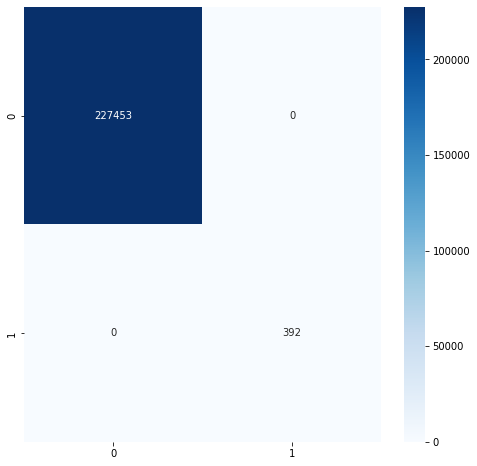

In [ ]:
# Predição com dados de treino
pred_rf = model.predict(data_train)

# Classification Report
print('Classification Report: \n', classification_report(target_train, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_train, pred_rf))
print("-" * 100)
print()

# Matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_train, pred_rf), annot=True, fmt='g', cmap = 'Blues');

O resultado é que houve *overfiting*, ou seja, o modelo se adequou totalmente aos dados de treinamento e possivelmente terá um desempenho acentuadamente inferior com os dados de teste. O resultado mostra um acerto de 100%.

Vamos verificar o resultado agora.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.95      0.82      0.88       100

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9996137776061234
----------------------------------------------------------------------------------------------------



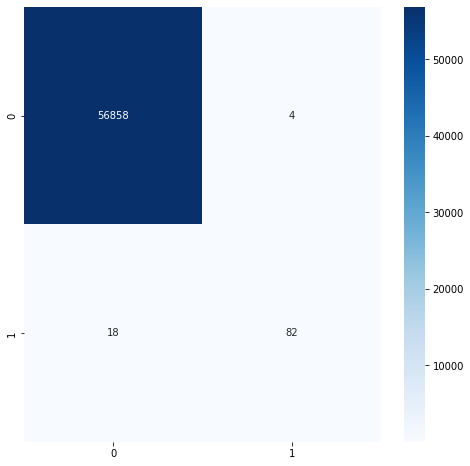

In [ ]:
# Predição com dados de teste
pred_rf = model.predict(data_test)

# Classification Report
print('Classification Report: \n', classification_report(target_test, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_test, pred_rf))
print("-" * 100)
print()

# Matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_test, pred_rf), annot=True, fmt='g', cmap = 'Blues');

O resultado foi satisfatório, a média do **f1-score** foi de 0.94. 

Neste ponto é importante ponderar algo. Em 56862 transações que realmente foram legais, houve apenas 4 classificadas errôneamente como fraude. Já entre as 100 transações fraudulentas, 18 foram errôneamente classificadas como legais. Cabe à Administradora de Cartões de Crédito decicidir qual ponto ideal entre arriscar aprovar uma transação fraudulenta e negar uma transação legal, pois isso envolve alguns riscos como perdas financeiras acentuadas, danos morais para os clientes, etc.

#### 5.2 - Ajuste de hiperparâmetros
Farei aqui uma tentativa de melhora no modelo de *machine learning* buscando ajustar alguns hiperparâmetros. Com isso busco dois objetivos, primeiramente a melhora na métrica **f1-score**, segundo, o menor uso de recursos computacionais. Neste trabalho, em alguns pontos o treinamento do modelo durou até 60 minutos. 

Importante lembrar que o modelo sofreu *overfiting*, portanto busquei de certa forma piorar o desempenho com os dados de treino.

Os hiperparâmetros testados foram '*criterion*', '*n_estimators*' e '*max_depth*'.



In [ ]:
# GridSearchCV

param_grid = {
    'criterion': ('gini', 'entropy'),
    'n_estimators': (10, 20, 50),
    'max_depth' : (3, 9 , 15)
    }

model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=5)

model_grid_search.fit(data_over, target_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 9, 15),
                         'n_estimators': (10, 20, 50)})

In [ ]:
print(f"Os melhores parâmetros são: "
      f"{model_grid_search.best_params_}")

Os melhores parâmetros são: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 20}


#### 5.3 Predição com hipermarâmetros ajustados

Com o modelo ajustado voltemos às predições.

In [ ]:
# Criação do modelo
random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 20, max_depth = 15)

In [ ]:
# Treinamento
model_rf = random_forest.fit(data_over, target_over)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       0.98      1.00      0.99       392

    accuracy                           1.00    227845
   macro avg       0.99      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9999736663082358
----------------------------------------------------------------------------------------------------



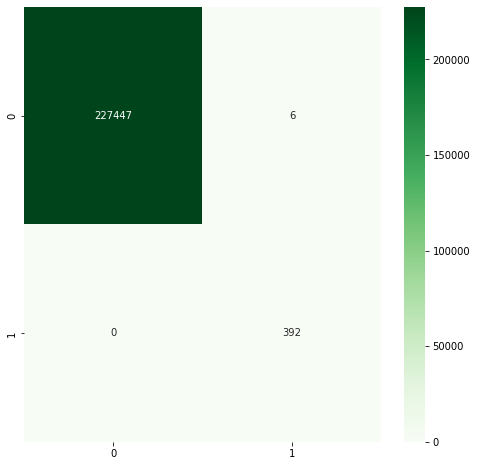

In [ ]:
# Predição com dados de treino
pred_random_forest = model_rf.predict(data_train)

# Classification Report
print('Classification Report: \n', classification_report(target_train, pred_random_forest))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_train, pred_random_forest))
print("-" * 100)
print()

# Matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_train, pred_random_forest), annot=True, fmt='g', cmap = 'Greens');

Houve uma pequena piora no resultado com os próprios dados de treino.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.89      0.82      0.85       100

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9995084442259752
----------------------------------------------------------------------------------------------------



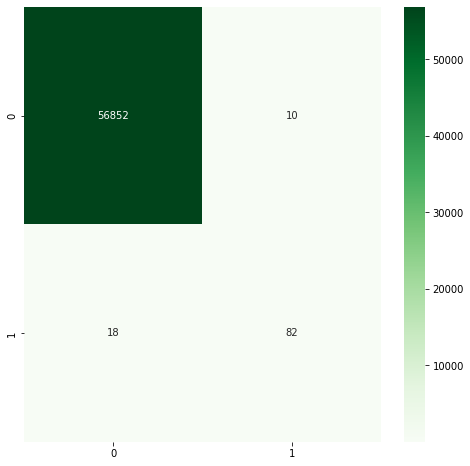

In [ ]:
# Predição com dados de teste
pred_random_forest = model_rf.predict(data_test)

# Classification Report
print('Classification Report: \n', classification_report(target_test, pred_random_forest))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_test, pred_random_forest))
print("-" * 100)
print()

# Matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_test, pred_random_forest), annot=True, fmt='g', cmap = 'Greens');

Basicamente obtivemos o mesmo resultado sem ajuste de parâmetros, porém limitando o tamanho das árvores de decisão no modelo Random Forest o desempenho computacional torna-se melhor.

## 6 - Conclusão

Usar **Machine Learning** para prevenção de fraudes com cartões de crédito se mostra muito vantajoso para as administradoras. Nosso modelo conseguiu um **f1-score** médio de 93%. Como expliquei durante o trabalho, é difícil encontrar o ponto ideal entre bloquear uma transação fraudulenta ou deixar de efetuar uma transação legal. Isso envolve alguns fatores como risco / retorno, questões de imagem e satisfação de clientes. 

Procurei demonstrar neste trabalho algumas técnicas que podem ser utilizadas e o desempenho obtido foi satisfatório.

## 7 - Referências


[1] https://idec.org.br/idec-na-imprensa/brasil-tem-36-fraudes-com-cartao-de-credito-por-minuto-na-internet?utm_campaign=&utm_adgroup=&creative=&keyword=&gclid=CjwKCAjwxOCRBhA8EiwA0X8hiyPYzaZ85YE85SrLJYDMj7p7DQ_qzXGHWICciZzaPrXTZkjpHwuKyhoCa78QAvD_BwE. Acessado em 21/03/2022

[2] https://olhardigital.com.br/2021/04/06/internet-e-redes-sociais/operacoes-com-cartoes-de-credito-correspondem-a-26-das-fraudes-digitais-no-brasil. Acessado em 21/03/2022

[3] https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais. Acessado em 28/03/2022

[4] https://medium.com/as-m%C3%A1quinas-que-pensam/m%C3%A9tricas-comuns-em-machine-learning-como-analisar-a-qualidade-de-chat-bots-inteligentes-m%C3%A9tricas-1ba580d7cc96. Acessado em 29/03/2022